In [1]:
!pip install ucimlrepo

Credit Risk Prediction - German Credit Data

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

data = fetch_ucirepo(id=144)
X = data.data.features
y = data.data.targets.iloc[:, 0]
y = y.replace({1: 1, 2: 0})


Rename Columns

In [3]:
X = X.rename(columns={
    'Attribute1': 'status_of_existing_checking_account',
    'Attribute2': 'duration_in_month',
    'Attribute3': 'credit_history',
    'Attribute4': 'purpose',
    'Attribute5': 'credit_amount',
    'Attribute6': 'savings_account_bonds',
    'Attribute7': 'present_employment_since',
    'Attribute8': 'installment_rate_in_percentage_of_disposable_income',
    'Attribute9': 'personal_status_and_sex',
    'Attribute10': 'other_debtors_guarantors',
    'Attribute11': 'present_residence_since',
    'Attribute12': 'property',
    'Attribute13': 'age_in_years',
    'Attribute14': 'other_installment_plans',
    'Attribute15': 'housing',
    'Attribute16': 'number_of_existing_credits_at_this_bank',
    'Attribute17': 'job',
    'Attribute18': 'number_of_people_being_liable_to_provide_maintenance_for',
    'Attribute19': 'telephone',
    'Attribute20': 'foreign_worker'
})

Preprocessing: One-Hot Encoding and Scaling

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include='int64').columns

preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)

Split Data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

Train Random Forest Model

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Evaluate Model

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy: 0.725
              precision    recall  f1-score   support

           0       0.56      0.40      0.47        60
           1       0.77      0.86      0.81       140

    accuracy                           0.72       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.71      0.72      0.71       200

[[ 24  36]
 [ 19 121]]


ROC Curve and AUC

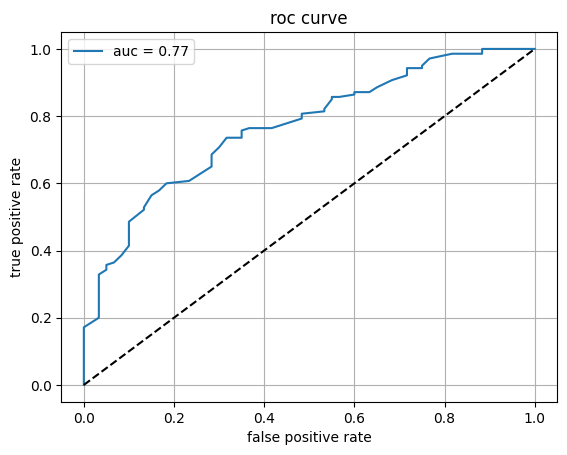

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"auc = {auc_score:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("roc curve")
plt.legend()
plt.grid(True)
plt.show()

Feature Importance

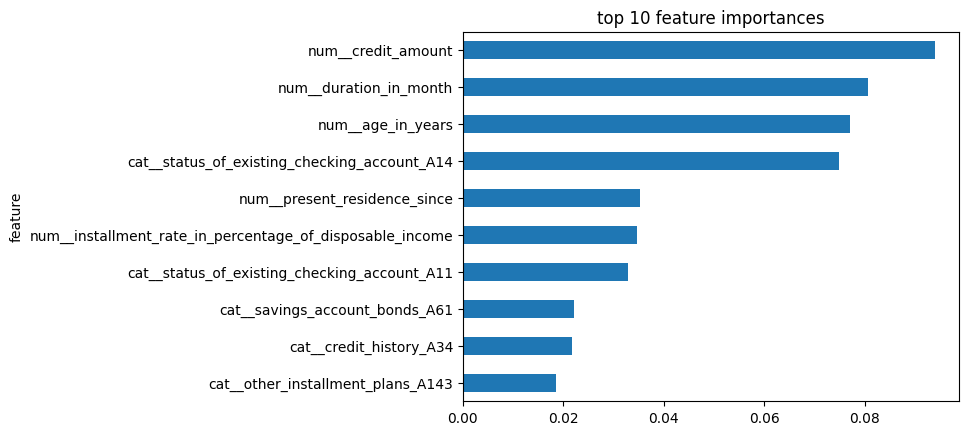

In [9]:
feature_names = preprocessor.get_feature_names_out()
importances = rf_model.feature_importances_

feat_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feat_df.head(10).plot(kind='barh', x='feature', y='importance', legend=False)
plt.title("top 10 feature importances")
plt.gca().invert_yaxis()
plt.show()